> # **Análisis de Datos Exploratorio y Análisis de Datos Descriptivo - DataFrame con las Transacciones de un Ecommerce**

*Nuestro proyecto de Análisis de Datos Exploratorio se basa en un proceso meticuloso diseñado para transformar datos brutos en insights accionables. Todo comienza con la conexión a Kaggle a través de su API, lo que nos permite acceder a un dataset diverso, brindándonos una base de información que nos servirá para todo el análisis donde utilizaremos Python junto con SQL a través de DuckDB para cargar, depurar y transformar un dataset que contiene variables numéricas y categóricas. Este enfoque híbrido nos permite asegurar la calidad de la información y disponer de una base confiable para nuestro análisis.*

*En la primera fase, nos enfocamos en el análisis descriptivo. Para las variables numéricas como Quantity, TotalValue y Price, calculamos medidas de tendencia central y dispersión como la media, mediana, mínimos, máximos y desviación estándar para comprender la naturaleza de cada variable. Utilizamos histogramas y diagramas de caja (boxplots) para visualizar la distribución de los datos, detectar asimetrías y señalar posibles outliers, lo que nos ayuda a identificar comportamientos atípicos en las transacciones.*

*Simultáneamente, examinamos las variables categóricas tales como Región, Categoría, Producto y CustomerName. A través de gráficos de barras y pie charts, evaluamos la frecuencia y proporción de cada categoría, lo que nos permite identificar las regiones y categorías más activas, así como focalizarnos en los elementos de mayor relevancia, como los top 10 en productos o clientes.*

*El Análisis Exploratorio de Datos (EDA) se profundiza en responder preguntas clave que guían la estrategia del negocio. Por ejemplo, exploramos la relación entre Quantity y TotalValue mediante histogramas y scatter plots, lo que nos ayuda a visualizar cómo se relacionan el volumen de compra y el valor de las transacciones. Asimismo, realizamos análisis temporal utilizando series de tiempo, gráficos de líneas basados en TransactionDate para identificar patrones estacionales y picos en la actividad transaccional.*

*Además, abordamos la segmentación por Región y Categoría a través de gráficos de barras agrupados o apilados, lo que facilita la identificación de las áreas con mayor volumen de transacciones y la popularidad de las diferentes categorías en cada región. La comparación entre el precio unitario y el valor total de las transacciones se realiza segmentando por categoría mediante diagramas de dispersión y boxplots, permitiendo detectar diferencias significativas en el comportamiento de los distintos segmentos.*

*En el análisis de clientes, se identifican los clientes únicos y se estudia su distribución geográfica, utilizando tanto técnicas de agrupación en SQL con DuckDB, por ejemplo, con consultas que emplean COUNT(DISTINCT CustomerID) como visualizaciones en Python para comparar el TotalValue generado por clientes de diferentes regiones. También se investiga la relación entre la fecha de registro de los clientes (SignupDate) y su actividad de compra, aplicando gráficos de dispersión y análisis de cohortes, lo que permite observar la evolución de las transacciones a lo largo del tiempo y detectar patrones en función de la temporalidad del registro.*

*En resumen, nuestro proyecto combina la potencia de Python y la eficiencia de SQL con DuckDB para transformar datos complejos en una narrativa visual y analítica clara. Cada etapa del proceso desde la limpieza y transformación, hasta la visualización y el análisis profundo está diseñada para extraer conocimientos significativos, facilitando la toma de decisiones estratégicas y abriendo la puerta a nuevas investigaciones y mejoras continuas.*

**https://www.kaggle.com/datasets/chadwambles/ecommerce-transactions/data**

---

In [1]:
# Instalamos la API de Kaggle (si aún no está instalada)
!pip install kaggle

# Descargamos el dataset en el directorio actual (/content)
!kaggle datasets download -d chadwambles/ecommerce-transactions -p /content

import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Abrimos y leemos el .ZIP que contiene la Carpeta con el DataSet
with zipfile.ZipFile('/content/ecommerce-transactions.zip', 'r') as zip_ref:

    # Extraemos el contenido del .ZIP que acabamos de abrir con la carpeta
    zip_ref.extractall('/content/ecommerce-transactions')

# Creamos el path donde está ubicado el archivo de Excel (.xlsx)
filename = 'ecommerce-transactions/EverMart_Online_Transactions.xlsx'

# Cargar todas las hojas del archivo Excel
data = pd.read_excel(filename, sheet_name=None)

# Conectar a una base de datos DuckDB (puede ser un archivo o en memoria)
con = duckdb.connect('ecommerce_SQL.db')  # Para una base de datos persistente

# Iterar por cada hoja y crear una tabla en DuckDB
for sheet_name, df in data.items():
    # Asegurarse de que el nombre de la tabla es válido en SQL (sin espacios, etc.)
    table_name = sheet_name.replace(' ', '_')
    # Registrar el DataFrame como tabla temporal
    con.register('temp_df', df)
    # Crear la tabla en DuckDB a partir del DataFrame registrado
    con.execute(f"CREATE TABLE {table_name} AS SELECT * FROM temp_df")
    # Desregistrar la tabla temporal
    con.unregister('temp_df')


Dataset URL: https://www.kaggle.com/datasets/chadwambles/ecommerce-transactions
License(s): CC0-1.0
  0% 0.00/240k [00:00<?, ?B/s]
100% 240k/240k [00:00<00:00, 12.4MB/s]


In [2]:
query_Transactions = """
SELECT trn.*
FROM Transactions trn
"""

df_Transactions = con.execute(query_Transactions).fetchdf()

df_Transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [3]:
query_Customers = """
SELECT cms.*
FROM Customers cms
"""

df_Customers = con.execute(query_Customers).fetchdf()

df_Customers.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [4]:
query_Products = """
SELECT pro.*
FROM Products pro
"""

df_Products = con.execute(query_Products).fetchdf()

df_Products.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [5]:
query_TotalEcommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.TransactionID
,cut.CustomerID
,cut.ProductID
,cut.TransactionDate
,cut.Quantity
,cut.TotalValue
,cut.Price
,cut.CustomerName
,cut.Region
,cut.SignupDate
,cut.ProductName
,cut.Category
FROM cte_Union_Tablas cut
ORDER BY cut.TransactionID
"""

df_TotalEcommerce = con.execute(query_TotalEcommerce).fetchdf()

df_TotalEcommerce.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00002,C0092,P034,2024-12-16 03:31:07,2,434.10,217.05,Jacqueline Zamora,Asia,2024-05-29,HomeSense T-Shirt,Clothing
2,T00003,C0028,P057,2024-01-25 14:28:34,4,958.80,239.70,Jennifer Pena,Asia,2024-06-29,ActiveWear Smartphone,Electronics
3,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,Kathleen Rodriguez,South America,2022-10-09,TechPro Textbook,Books
4,T00005,C0150,P087,2024-05-25 17:44:48,2,580.34,290.17,Angela Williams,South America,2022-09-13,TechPro Running Shoes,Clothing
5,T00006,C0076,P053,2024-12-01 20:44:37,3,824.82,274.94,Emily Roberts,South America,2024-02-11,TechPro Rug,Home Decor
6,T00007,C0173,P023,2024-05-06 18:05:22,4,1818.12,454.53,Francisco Young,Asia,2022-10-06,ActiveWear Cookware Set,Home Decor
7,T00008,C0067,P069,2024-10-17 00:45:17,1,100.81,100.81,Carl Gonzalez,North America,2023-07-06,BookWorld Biography,Books
8,T00009,C0086,P095,2024-04-06 03:41:22,4,909.04,227.26,Stephanie Peterson,Europe,2022-09-18,BookWorld Cookware Set,Home Decor
9,T00010,C0194,P053,2024-03-14 11:55:39,1,274.94,274.94,Stacy Cook,North America,2024-05-04,TechPro Rug,Home Decor


## A continuación realizamos las siguientes operaciones en el DataFrame:

- Conversión de tipos de datos en las columnas.
- Visualizamos la información del dataframe y sus columnas.
- Verificamos la cantidad de nulos y nan.
- Eliminamos los valores duplicados.

In [6]:
df_TotalEcommerce['SignupDate'] = pd.to_datetime(df_TotalEcommerce['SignupDate'])
df_TotalEcommerce['TransactionDate'] = pd.to_datetime(df_TotalEcommerce['TransactionDate'])

In [7]:
df_TotalEcommerce.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00002,C0092,P034,2024-12-16 03:31:07,2,434.10,217.05,Jacqueline Zamora,Asia,2024-05-29,HomeSense T-Shirt,Clothing
2,T00003,C0028,P057,2024-01-25 14:28:34,4,958.80,239.70,Jennifer Pena,Asia,2024-06-29,ActiveWear Smartphone,Electronics
3,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,Kathleen Rodriguez,South America,2022-10-09,TechPro Textbook,Books
4,T00005,C0150,P087,2024-05-25 17:44:48,2,580.34,290.17,Angela Williams,South America,2022-09-13,TechPro Running Shoes,Clothing


In [8]:
df_TotalEcommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [9]:
df_TotalEcommerce.describe()

,TransactionDate,Quantity,TotalValue,Price,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.200000256
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,NaN


In [10]:
df_TotalEcommerce.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0
CustomerName,0
Region,0
SignupDate,0


In [11]:
df_TotalEcommerce.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0
CustomerName,0
Region,0
SignupDate,0


In [12]:
df_TotalEcommerce.drop_duplicates(inplace=True)

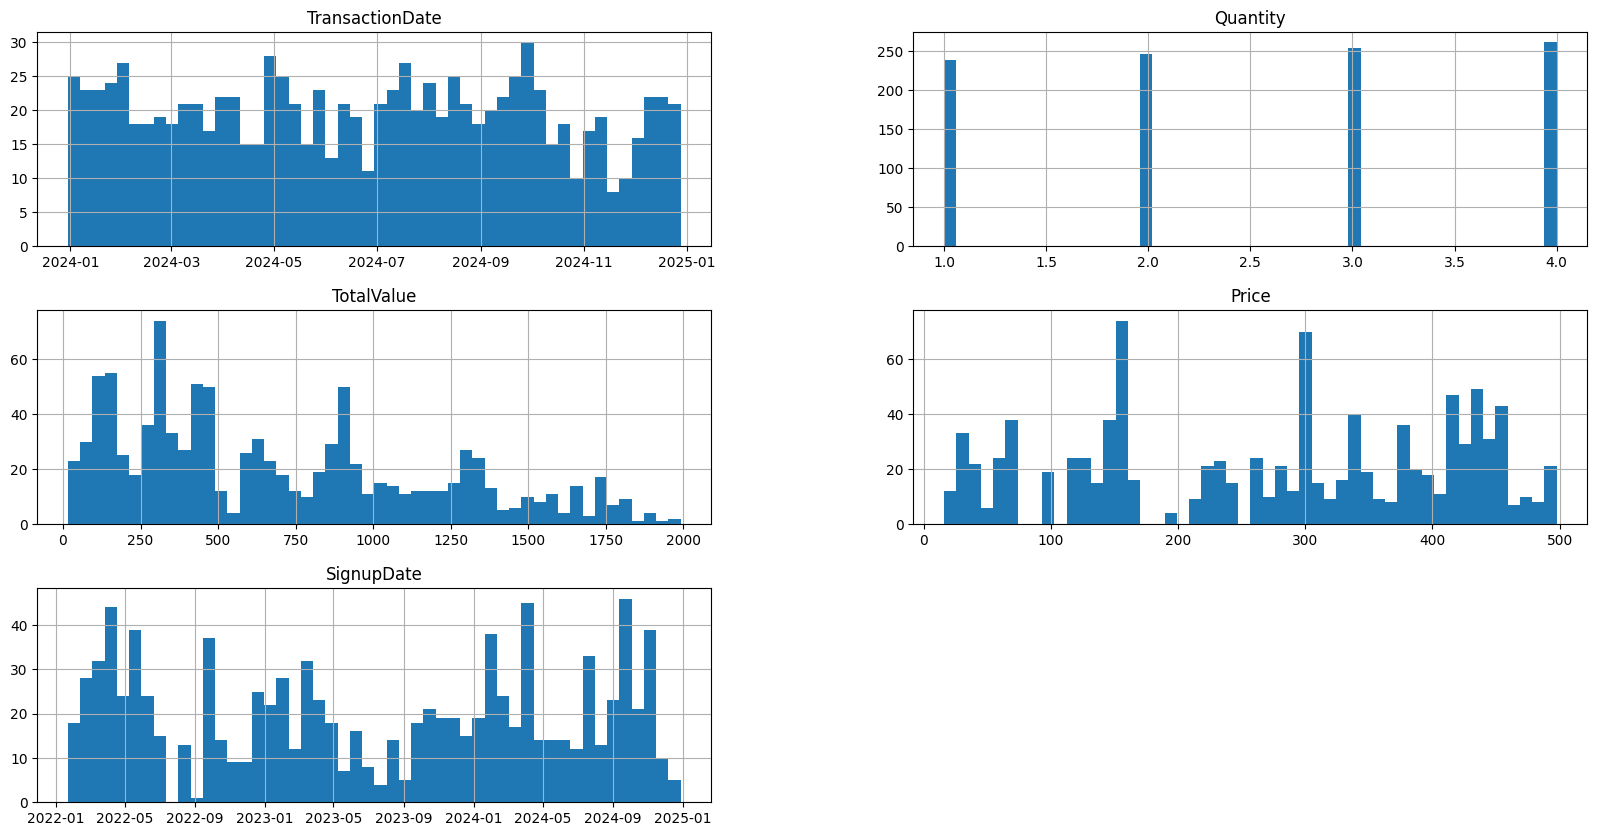

In [13]:
df_TotalEcommerce.hist(figsize=(20, 10), bins=50)
plt.xticks(rotation=45)
plt.show()

---
### Análisis Descriptivo de Variables Numéricas
- Variables Numéricas (Medidas de tendencia central y dispersión)
---

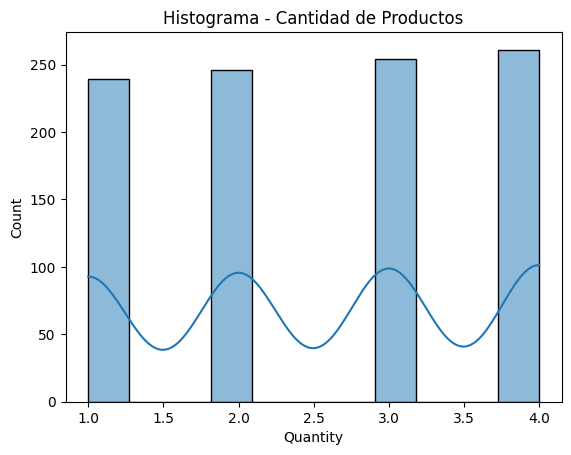

In [14]:
sns.histplot(data=df_TotalEcommerce, x="Quantity", kde=True)
plt.title("Histograma - Cantidad de Productos")
plt.show()

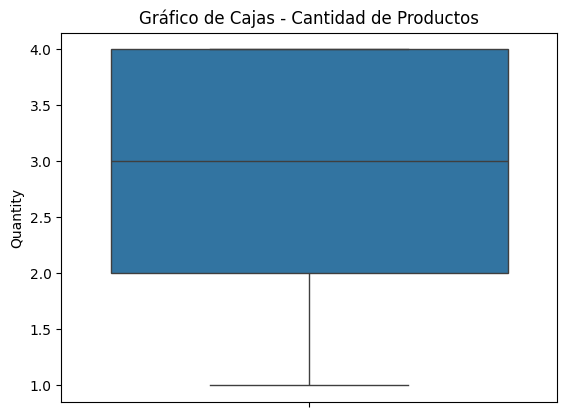

In [15]:
sns.boxplot(data=df_TotalEcommerce, y="Quantity")
plt.title("Gráfico de Cajas - Cantidad de Productos")
plt.show()

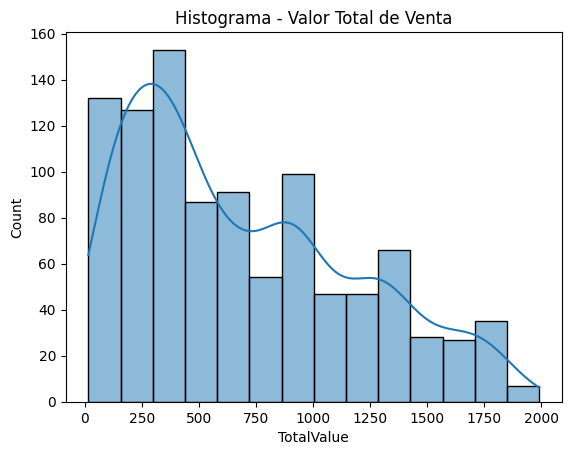

In [16]:
sns.histplot(data=df_TotalEcommerce, x="TotalValue", kde=True)
plt.title("Histograma - Valor Total de Venta")
plt.show()

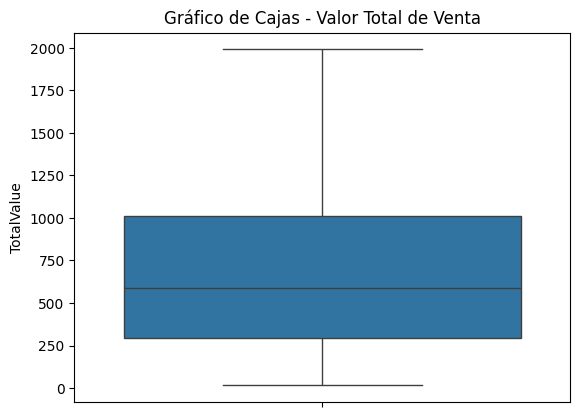

In [17]:
sns.boxplot(data=df_TotalEcommerce, y="TotalValue")
plt.title("Gráfico de Cajas - Valor Total de Venta")
plt.show()

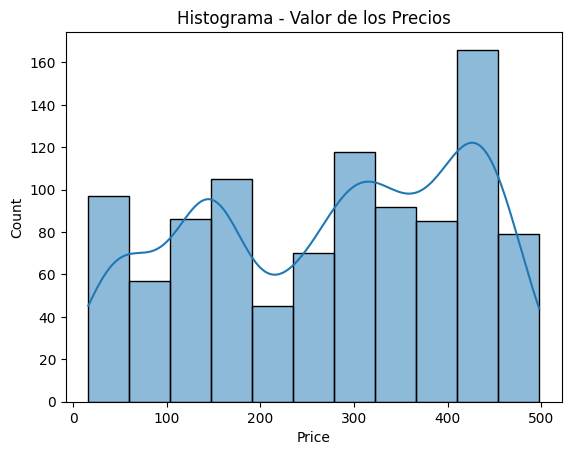

In [18]:
sns.histplot(data=df_TotalEcommerce, x="Price", kde=True)
plt.title("Histograma - Valor de los Precios")
plt.show()

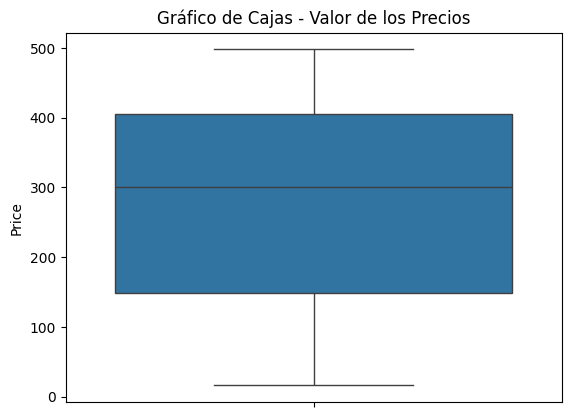

In [19]:
sns.boxplot(data=df_TotalEcommerce, y="Price")
plt.title("Gráfico de Cajas - Valor de los Precios")
plt.show()

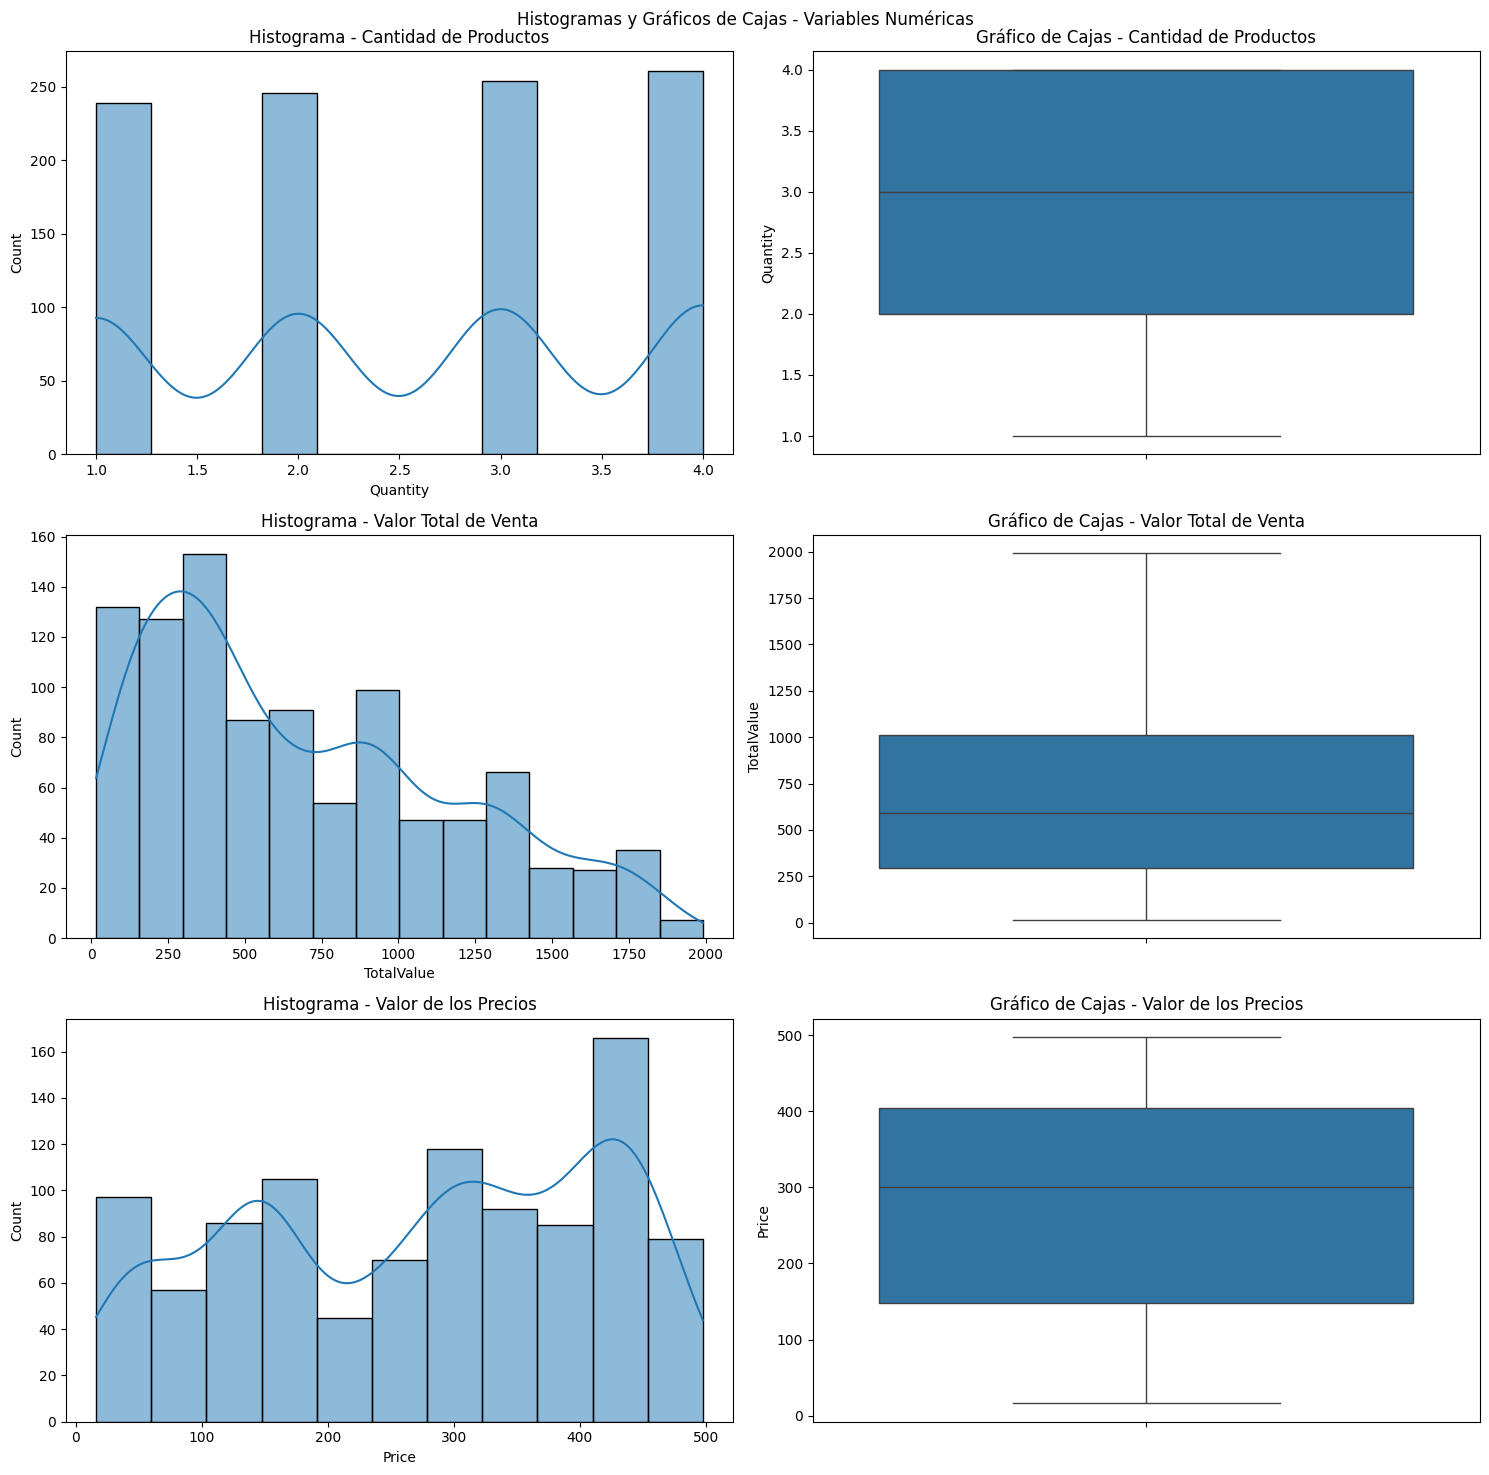

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.histplot(data=df_TotalEcommerce, x="Quantity", ax=ax1, kde=True)
ax1.set_title('Histograma - Cantidad de Productos')
sns.boxplot(data=df_TotalEcommerce, y="Quantity", ax=ax2)
ax2.set_title('Gráfico de Cajas - Cantidad de Productos')

sns.histplot(data=df_TotalEcommerce, x="TotalValue", ax=ax3, kde=True)
ax3.set_title('Histograma - Valor Total de Venta')
sns.boxplot(data=df_TotalEcommerce, y="TotalValue", ax=ax4)
ax4.set_title('Gráfico de Cajas - Valor Total de Venta')

sns.histplot(data=df_TotalEcommerce, x="Price", ax=ax5, kde=True)
ax5.set_title('Histograma - Valor de los Precios')
sns.boxplot(data=df_TotalEcommerce, y="Price", ax=ax6)
ax6.set_title('Gráfico de Cajas - Valor de los Precios')

fig.suptitle('Histogramas y Gráficos de Cajas - Variables Numéricas')

plt.tight_layout()
plt.show()

---
### Análisis Descriptivo de Variables Categóricas
- Frecuencia y proporción
---

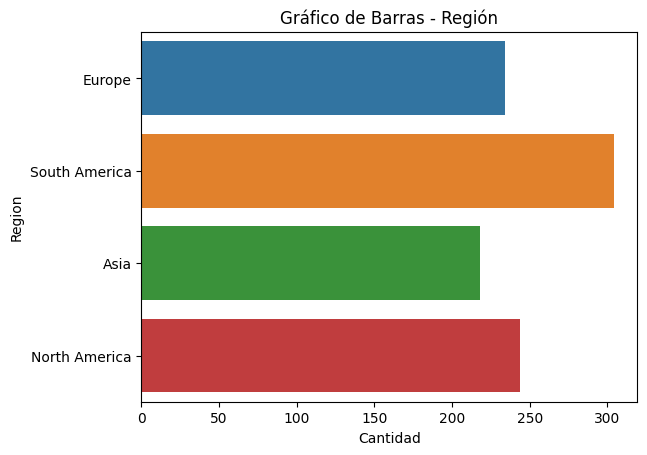

In [21]:
query_Region_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.Region,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY cut.Region
"""

df_Region_Ecommerce = con.execute(query_Region_Ecommerce).fetchdf()

sns.barplot(data=df_Region_Ecommerce, x="Cantidad", y="Region", hue="Region")
plt.title("Gráfico de Barras - Región")
plt.show()

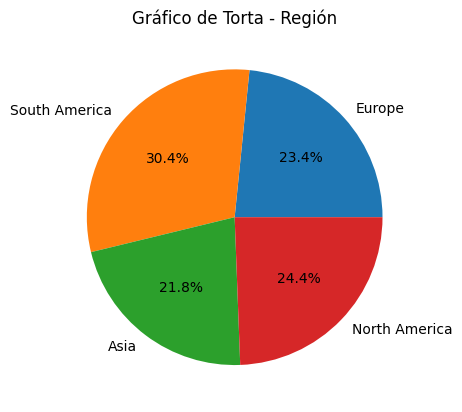

In [22]:
plt.pie(df_Region_Ecommerce['Cantidad'], labels=df_Region_Ecommerce['Region'], autopct='%1.1f%%')
plt.title("Gráfico de Torta - Región")
plt.show()

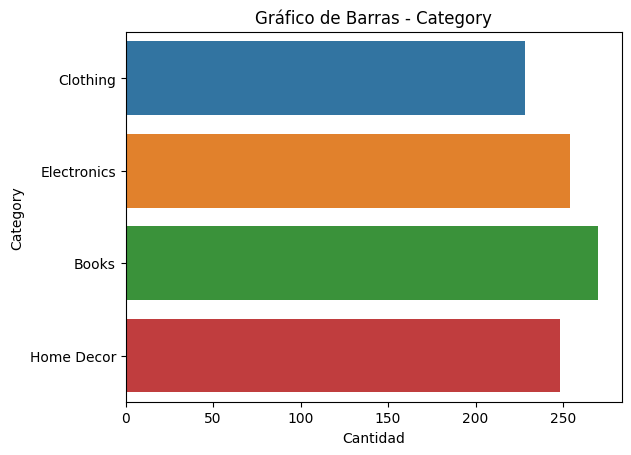

In [23]:
query_Category_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.Category,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY cut.Category
"""

df_Category_Ecommerce = con.execute(query_Category_Ecommerce).fetchdf()

sns.barplot(data=df_Category_Ecommerce, x="Cantidad", y="Category", hue="Category")
plt.title("Gráfico de Barras - Category")
plt.show()

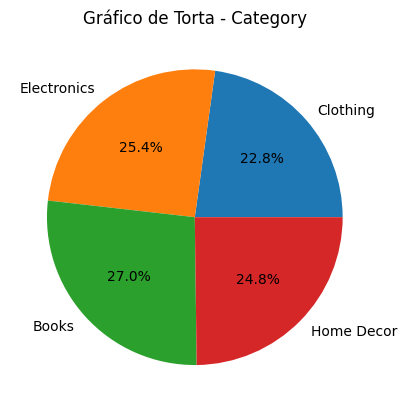

In [24]:
plt.pie(df_Category_Ecommerce['Cantidad'], labels=df_Category_Ecommerce['Category'], autopct='%1.1f%%')
plt.title("Gráfico de Torta - Category")
plt.show()

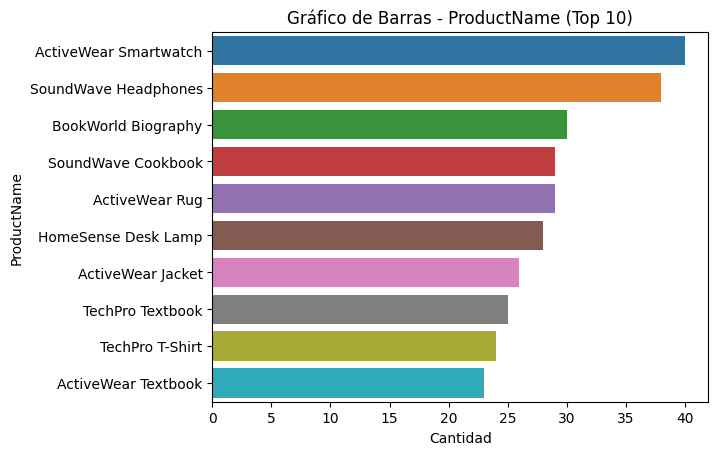

In [25]:
query_Product_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.ProductName,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY cut.ProductName
ORDER BY Cantidad DESC
LIMIT 10
"""

df_Product_Ecommerce = con.execute(query_Product_Ecommerce).fetchdf()

sns.barplot(data=df_Product_Ecommerce, x="Cantidad", y="ProductName", hue="ProductName")
plt.title("Gráfico de Barras - ProductName (Top 10)")
plt.show()

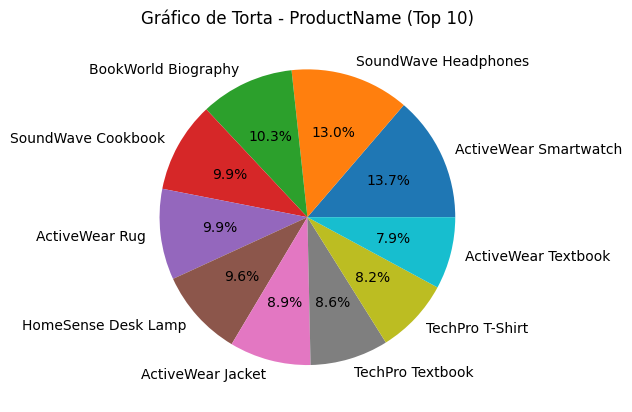

In [26]:
plt.pie(df_Product_Ecommerce['Cantidad'], labels=df_Product_Ecommerce['ProductName'], autopct='%1.1f%%')
plt.title("Gráfico de Torta - ProductName (Top 10)")
plt.show()

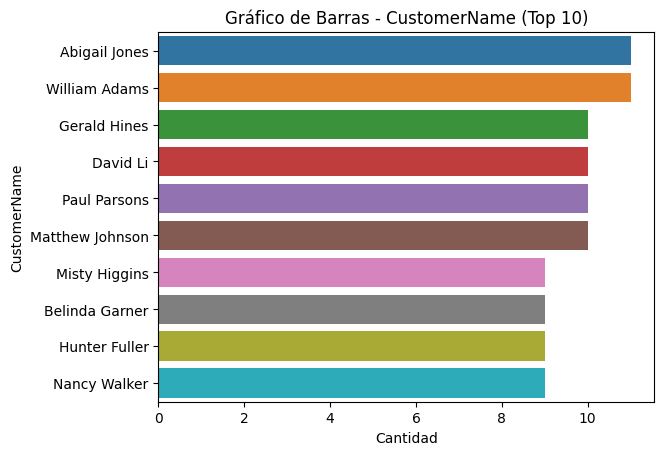

In [27]:
query_Customer_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.CustomerName,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY cut.CustomerName
ORDER BY Cantidad DESC
LIMIT 10
"""

df_Customer_Ecommerce = con.execute(query_Customer_Ecommerce).fetchdf()

sns.barplot(data=df_Customer_Ecommerce, x="Cantidad", y="CustomerName", hue="CustomerName")
plt.title("Gráfico de Barras - CustomerName (Top 10)")
plt.show()

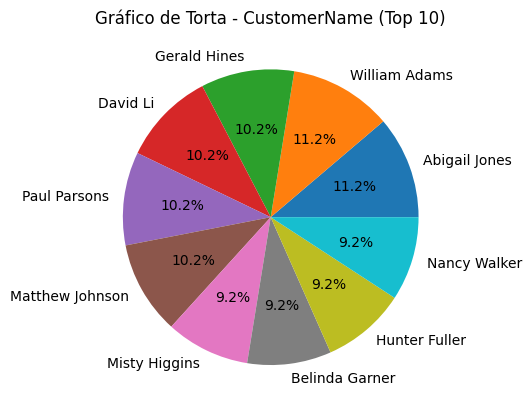

In [28]:
plt.pie(df_Customer_Ecommerce['Cantidad'], labels=df_Customer_Ecommerce['CustomerName'], autopct='%1.1f%%')
plt.title("Gráfico de Torta - CustomerName (Top 10)")
plt.show()

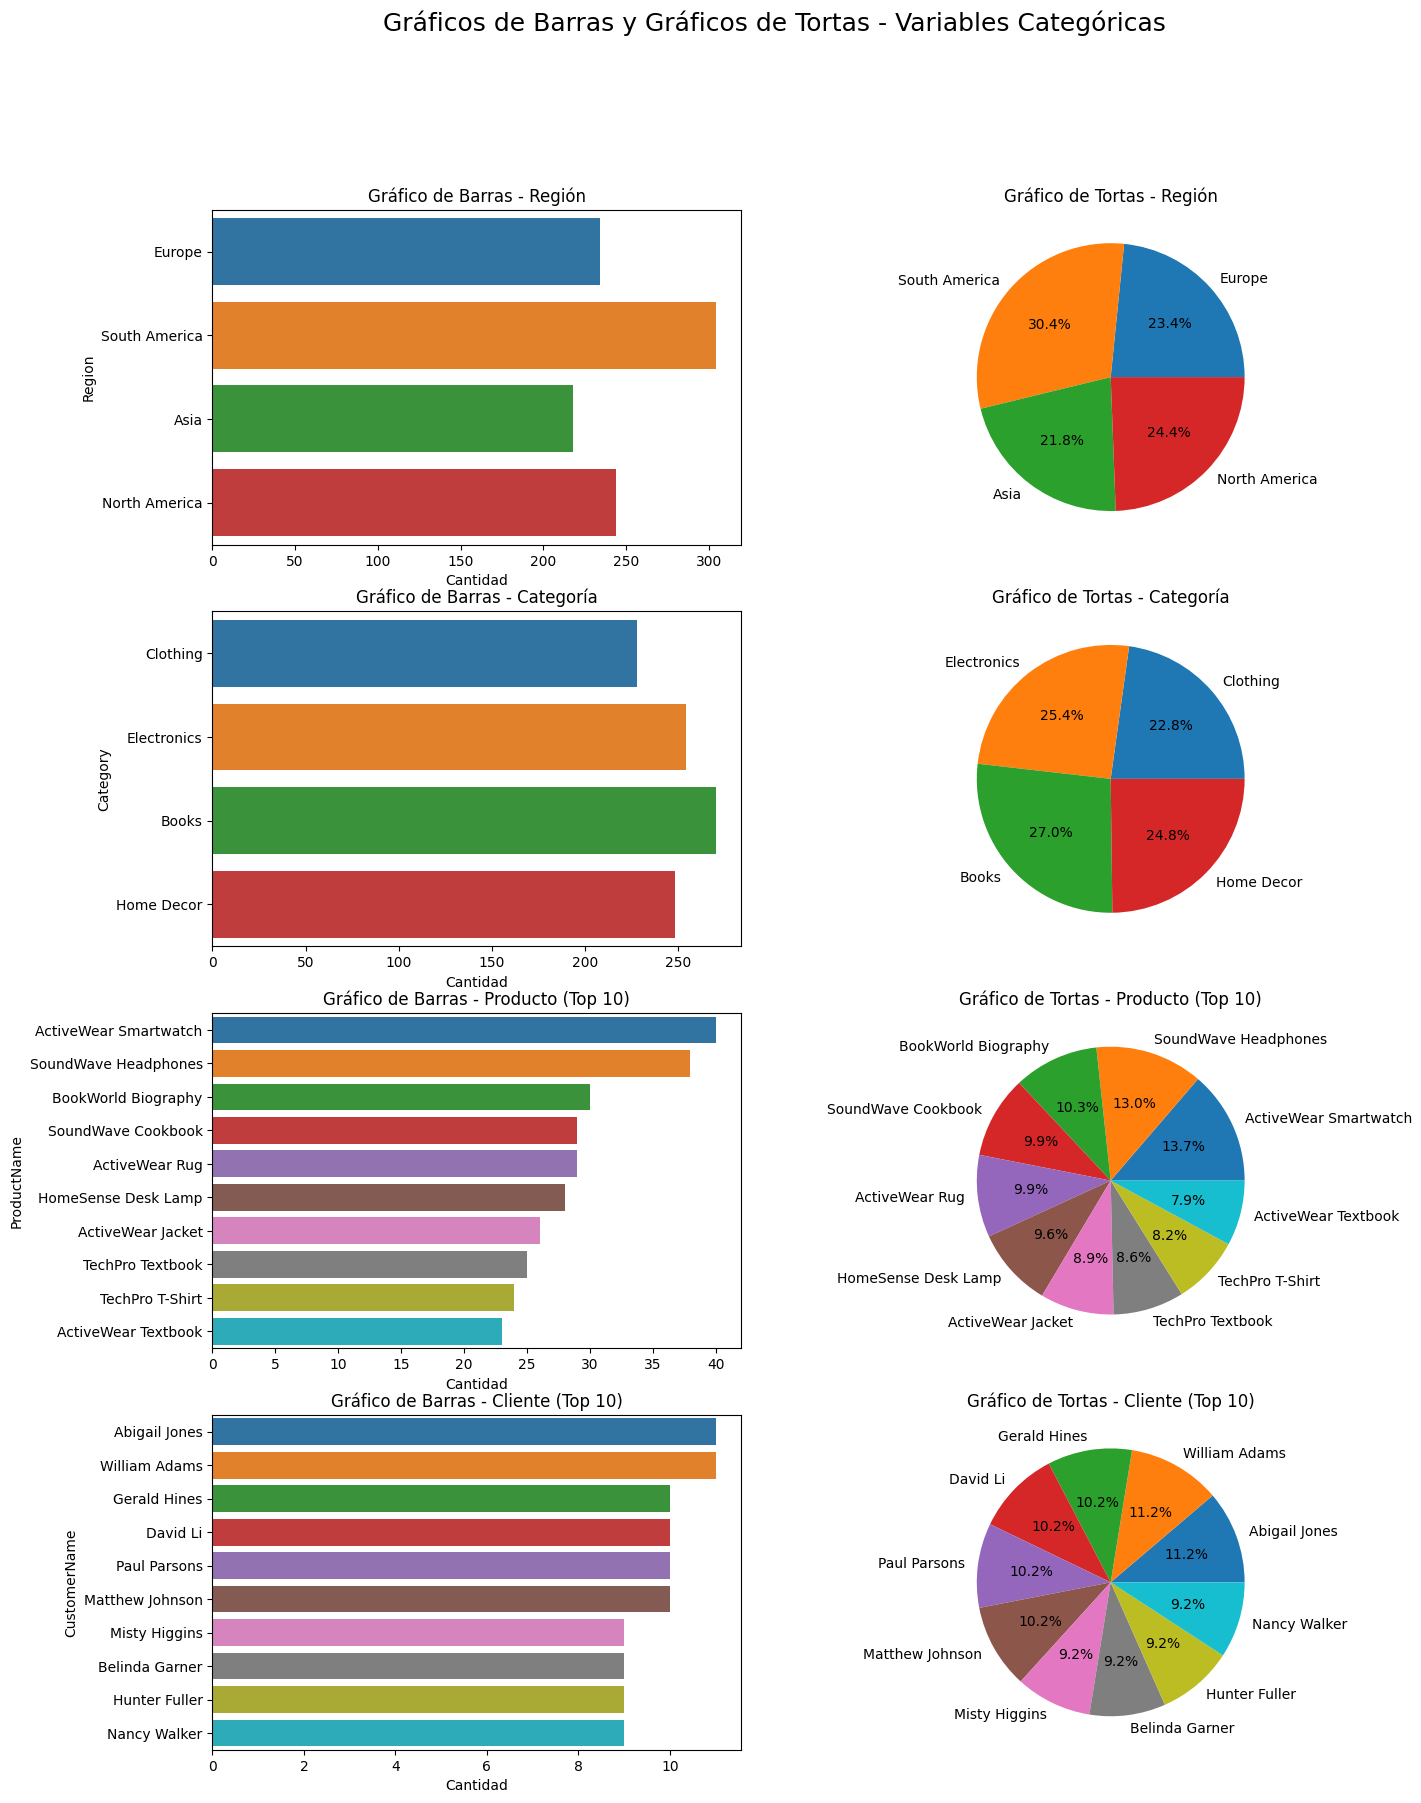

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

sns.barplot(data=df_Region_Ecommerce, x="Cantidad", y="Region", hue="Region", ax=ax1)
ax1.set_title('Gráfico de Barras - Región')
ax2.pie(df_Region_Ecommerce['Cantidad'], labels=df_Region_Ecommerce['Region'], autopct='%1.1f%%')
ax2.set_title('Gráfico de Tortas - Región')

sns.barplot(data=df_Category_Ecommerce, x="Cantidad", y="Category", hue="Category", ax=ax3)
ax3.set_title('Gráfico de Barras - Categoría')
ax4.pie(df_Category_Ecommerce['Cantidad'], labels=df_Category_Ecommerce['Category'], autopct='%1.1f%%')
ax4.set_title('Gráfico de Tortas - Categoría')

sns.barplot(data=df_Product_Ecommerce, x="Cantidad", y="ProductName", hue="ProductName", ax=ax5)
ax5.set_title('Gráfico de Barras - Producto (Top 10)')
ax6.pie(df_Product_Ecommerce['Cantidad'], labels=df_Product_Ecommerce['ProductName'], autopct='%1.1f%%')
ax6.set_title('Gráfico de Tortas - Producto (Top 10)')

sns.barplot(data=df_Customer_Ecommerce, x="Cantidad", y="CustomerName", hue="CustomerName", ax=ax7)
ax7.set_title('Gráfico de Barras - Cliente (Top 10)')
ax8.pie(df_Customer_Ecommerce['Cantidad'], labels=df_Customer_Ecommerce['CustomerName'], autopct='%1.1f%%')
ax8.set_title('Gráfico de Tortas - Cliente (Top 10)')

fig.suptitle('Gráficos de Barras y Gráficos de Tortas - Variables Categóricas', fontsize=18)
plt.show()

---
### Información sobre los Clientes
- Top 20 Clientes con mayor cantidad de compras.
---

In [30]:
query_Info_Customer_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.CustomerName,
cut.SignupDate,
cut.Region,
COUNT(1) AS Cantidad_Compras
FROM cte_Union_Tablas cut
GROUP BY cut.CustomerName, cut.SignupDate, cut.Region
ORDER BY Cantidad_Compras DESC
LIMIT 20
"""

df_Info_Customer_Ecommerce = con.execute(query_Info_Customer_Ecommerce).fetchdf()

df_Info_Customer_Ecommerce

,CustomerName,SignupDate,Region,Cantidad_Compras
0,Abigail Jones,2022-05-09,North America,11
1,William Adams,2023-08-19,North America,11
2,David Li,2024-01-13,North America,10
3,Gerald Hines,2024-07-10,North America,10
4,Paul Parsons,2023-02-23,Europe,10
5,Matthew Johnson,2022-04-16,Asia,10
6,Hunter Fuller,2022-05-16,South America,9
7,Belinda Garner,2024-09-17,Asia,9
8,Juan Mcdaniel,2022-04-09,South America,9
9,Misty Higgins,2023-05-01,Europe,9


---
### Análisis Exploratorio de Datos (EDA)
- El objetivo identificar patrones, relaciones y posibles anomalías.
---

---
### Distribución de Transacciones y Volumen de Compra:
- ¿Cuál es la distribución de las cantidades compradas y cómo se relaciona con el TotalValue?
---

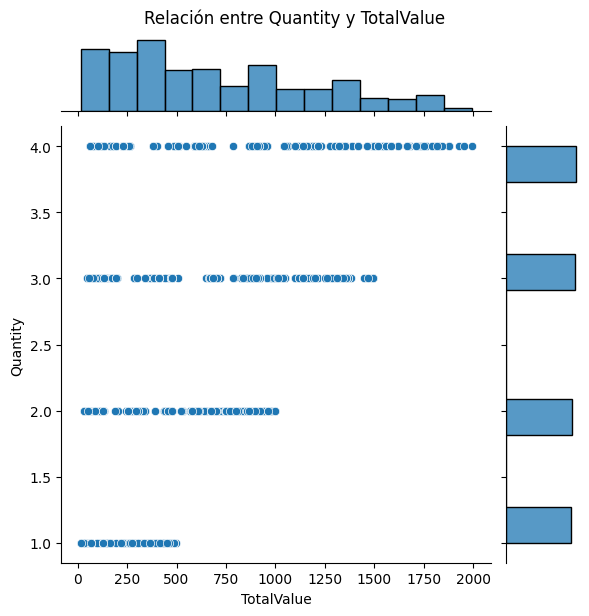

In [31]:
sns.jointplot(data=df_TotalEcommerce, x="TotalValue", y="Quantity", kind="scatter")
plt.suptitle("Relación entre Quantity y TotalValue", y=1.02)
plt.show()

# Conclusión General:

El gráfico de dispersión (jointplot) muestra que, en general, a medida que aumenta la cantidad (Quantity) comprada, el valor total (TotalValue) tiende a ser mayor. Sin embargo, se observan algunos valores muy por encima, lo que sugiere que hay transacciones excepcionales donde esta relación no es tan directa.

---
### Análisis Temporal:
- ¿Cómo varían las transacciones a lo largo del tiempo? ¿Existen patrones estacionales o picos en determinadas fechas?
---

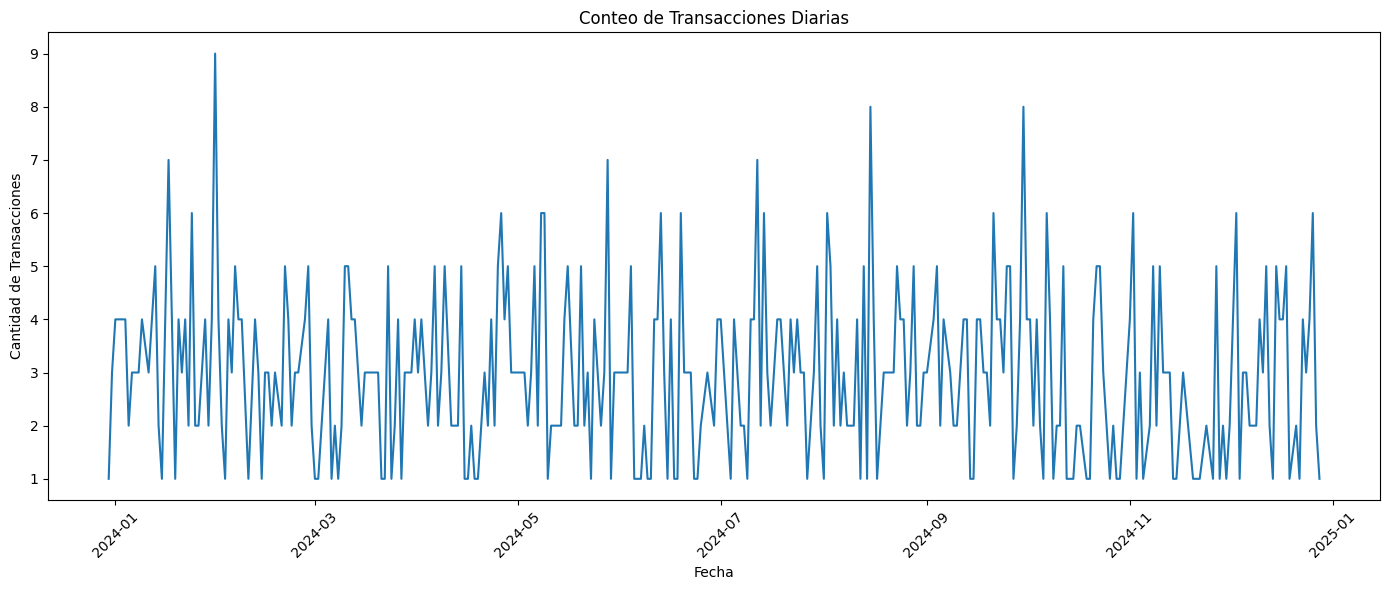

In [32]:
query_Agrupacion_Dia_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT DATE_TRUNC('day', cut.TransactionDate) AS Dia,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY Dia
ORDER BY Dia
"""

df_Agrupacion_Dia_Ecommerce = con.execute(query_Agrupacion_Dia_Ecommerce).fetchdf()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Dia', y='Cantidad', data=df_Agrupacion_Dia_Ecommerce)
plt.title('Conteo de Transacciones Diarias')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

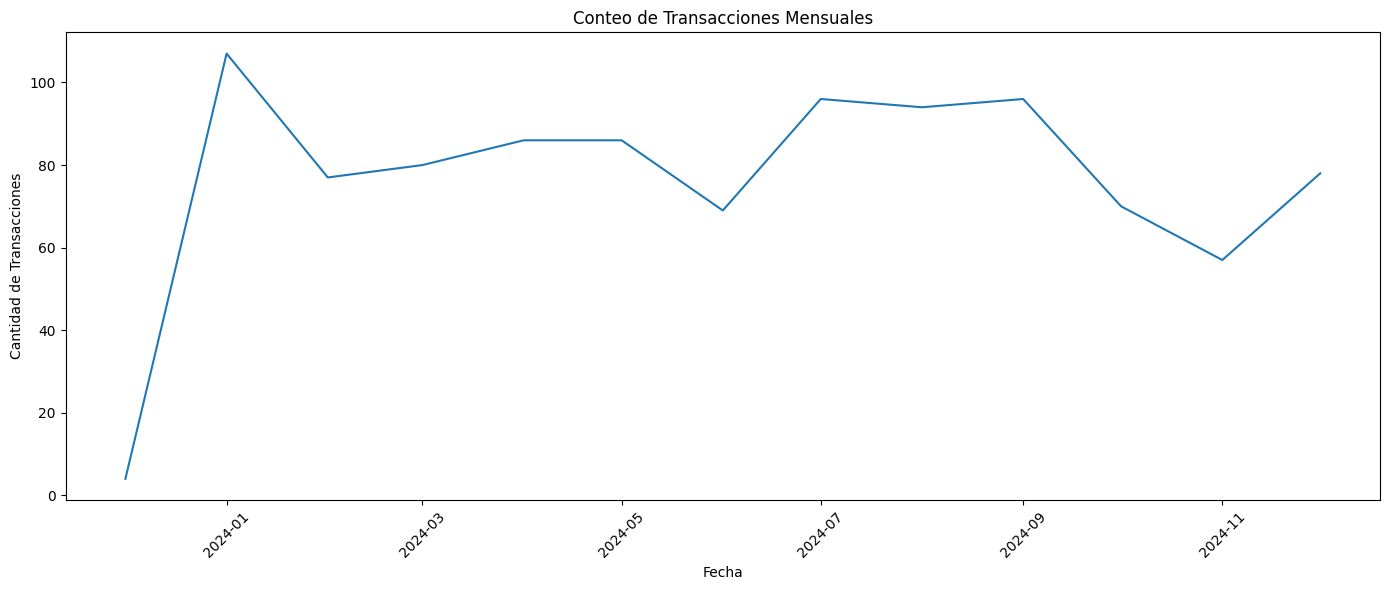

In [33]:
query_Agrupacion_Mes_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT DATE_TRUNC('month', cut.TransactionDate) AS Mes,
COUNT(1) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY Mes
ORDER BY Mes
"""

df_Agrupacion_Mes_Ecommerce = con.execute(query_Agrupacion_Mes_Ecommerce).fetchdf()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Mes', y='Cantidad', data=df_Agrupacion_Mes_Ecommerce)
plt.title('Conteo de Transacciones Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusión General:

Los gráficos de líneas diarios y mensuales evidencian una tendencia global en el número de transacciones, con ciertos picos en fechas específicas como en el mes de enero. Esto sugiere la presencia de patrones estacionales o eventos puntuales (como promociones o eventos especiales) que impulsan la actividad de compra.

---
### Segmentación por Región y Categoría:
- ¿Qué regiones tienen mayor volumen de transacciones? ¿Cuál es la categoría de productos más vendida en cada región?
---

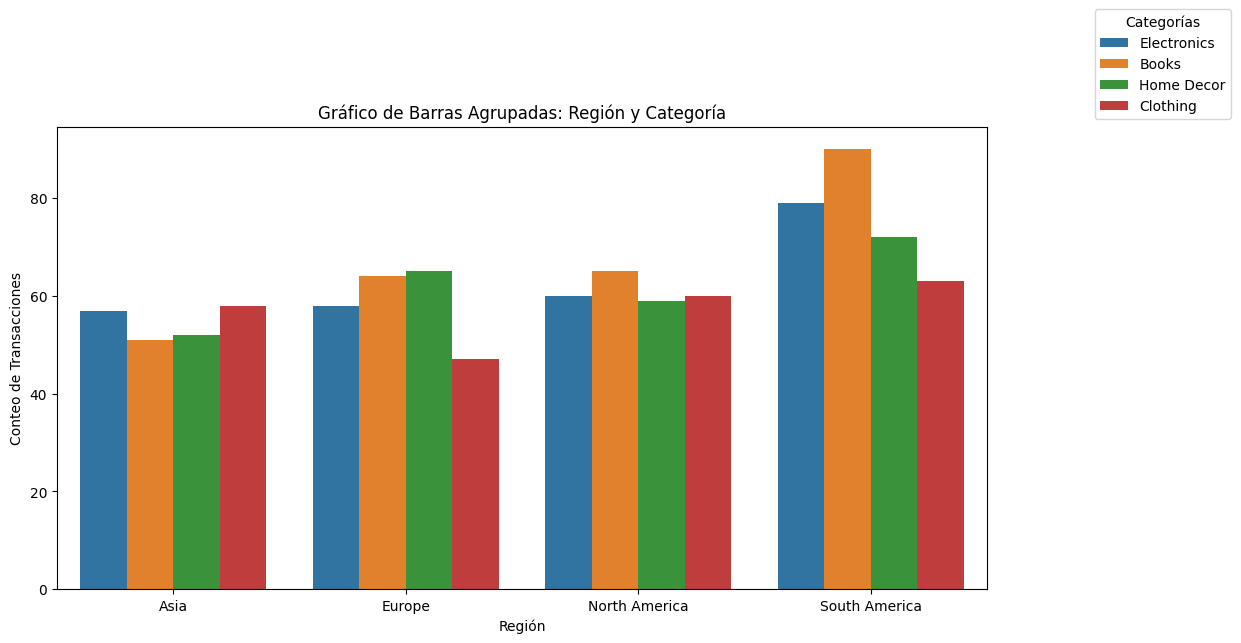

In [34]:
query_Agrupacion_Region_Category_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.Region,
cut.Category,
COUNT(*) AS Cantidad
FROM cte_Union_Tablas cut
GROUP BY cut.Region, cut.Category
ORDER BY Region
"""

df_Agrupacion_Region_Category_Ecommerce = con.execute(query_Agrupacion_Region_Category_Ecommerce).fetchdf()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Cantidad', hue='Category', data=df_Agrupacion_Region_Category_Ecommerce)
plt.title("Gráfico de Barras Agrupadas: Región y Categoría")
plt.xlabel("Región")
plt.ylabel("Conteo de Transacciones")
plt.legend(title="Categorías", bbox_to_anchor=(1.02,1.02,0.25,0.25))
plt.show()

# Conclusión General:

El gráfico de barras agrupadas permite identificar que algunas regiones concentran un mayor número de transacciones  Además, se destaca que en cada región predominan ciertas categorías de productos como por ejemplo en Asia la categoría Clothing, en Europe la categoría Home Decor y la categoría Books, y en South America la categoría Books y la categoría Electronics, lo cual puede ayudar a enfocar estrategias de venta según el mercado regional.

---
### Comparación de Precios y Valores Totales:
- ¿Existe alguna relación entre el precio unitario y el valor total de la transacción? ¿Se observan diferencias significativas por categoría?
---

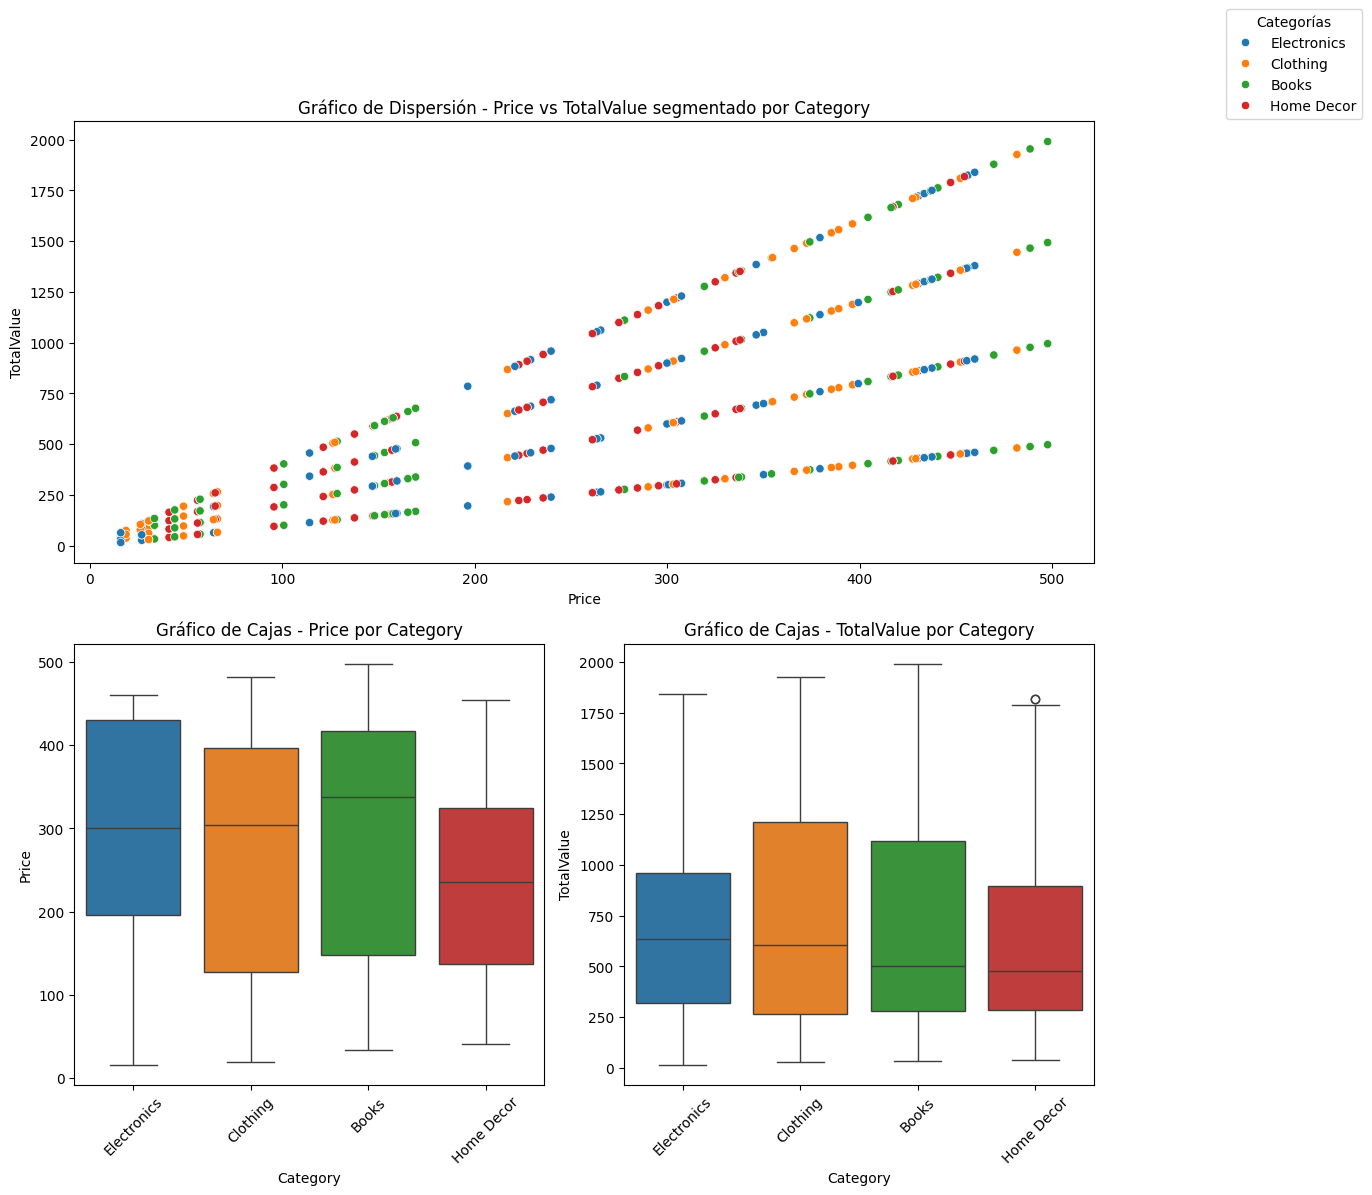

In [35]:
plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 1, 1)
sns.scatterplot(data=df_TotalEcommerce, x='Price', y='TotalValue', hue='Category', ax=ax1)
ax1.set_title("Gráfico de Dispersión - Price vs TotalValue segmentado por Category")
ax1.set_xlabel("Price")
ax1.set_ylabel("TotalValue")
plt.legend(title="Categorías", bbox_to_anchor=(1.02,1.02,0.25,0.25))

ax2 = plt.subplot(2, 2, 3)
sns.boxplot(data=df_TotalEcommerce, x='Category', y='Price', hue='Category', ax=ax2)
ax2.set_title("Gráfico de Cajas - Price por Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Price")
plt.xticks(rotation=45)

ax3 = plt.subplot(2, 2, 4)
sns.boxplot(data=df_TotalEcommerce, x='Category', y='TotalValue', hue='Category', ax=ax3)
ax3.set_title("Gráfico de Cajas - TotalValue por Category")
ax3.set_xlabel("Category")
ax3.set_ylabel("TotalValue")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Conclusión General:
Los gráficos de dispersión y de cajas indican que existe una relación directa entre el precio unitario y el valor total, ya que el TotalValue suele ser consecuencia del precio multiplicado por la cantidad. Además, se aprecian diferencias notables entre categorías, reflejando distintos rangos de precio y comportamientos de compra según el tipo de producto.

---
### Análisis de Clientes:
- ¿Cuántos clientes únicos hay y cómo se distribuyen geográficamente? ¿Los clientes de ciertas regiones generan mayor TotalValue?
---

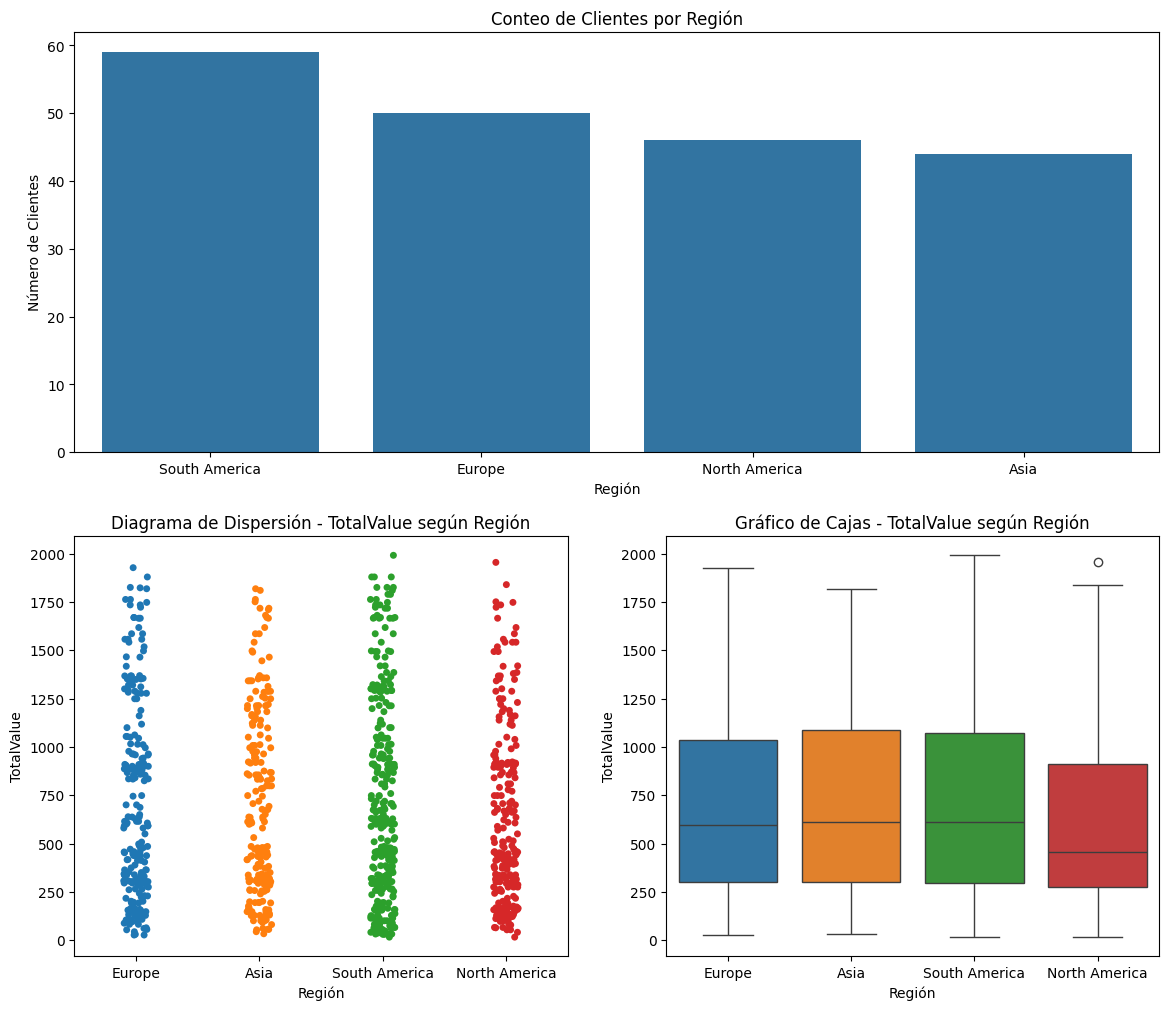

In [36]:
query_Agrupacion_Region_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT cut.Region,
COUNT(DISTINCT cut.CustomerID) AS ClientesUnicos,
FROM cte_Union_Tablas cut
GROUP BY cut.Region
ORDER BY ClientesUnicos DESC
"""

df_Agrupacion_Region_Ecommerce = con.execute(query_Agrupacion_Region_Ecommerce).fetchdf()

plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 1, 1)
sns.barplot(data=df_Agrupacion_Region_Ecommerce, x='Region', y='ClientesUnicos', ax=ax1)
ax1.set_title('Conteo de Clientes por Región')
ax1.set_xlabel('Región')
ax1.set_ylabel('Número de Clientes')

ax2 = plt.subplot(2, 2, 3)
sns.stripplot(data=df_TotalEcommerce, x='Region', y='TotalValue', hue='Region', ax=ax2)
ax2.set_title('Diagrama de Dispersión - TotalValue según Región')
ax2.set_xlabel('Región')
ax2.set_ylabel('TotalValue')

ax3 = plt.subplot(2, 2, 4)
sns.boxplot(data=df_TotalEcommerce, x='Region', y='TotalValue', hue='Region', ax=ax3)
ax3.set_title('Gráfico de Cajas - TotalValue según Región')
ax3.set_xlabel('Región')
ax3.set_ylabel('TotalValue')

plt.show()

# Conclusión General:



Hay más clientes únicos en South America, pero aún así Europa,y Asia logran mantener una Media igual o similar South America.
Esto implica que, a pesar de tener más clientes, South America no siempre lidera en volumen monetario.

---
### Fecha de Registro vs. Actividad de Compra:
- ¿Existe alguna relación entre la fecha de registro (SignupDate) de los clientes y su actividad de compra (por ejemplo, el TotalValue o Quantity)?
---

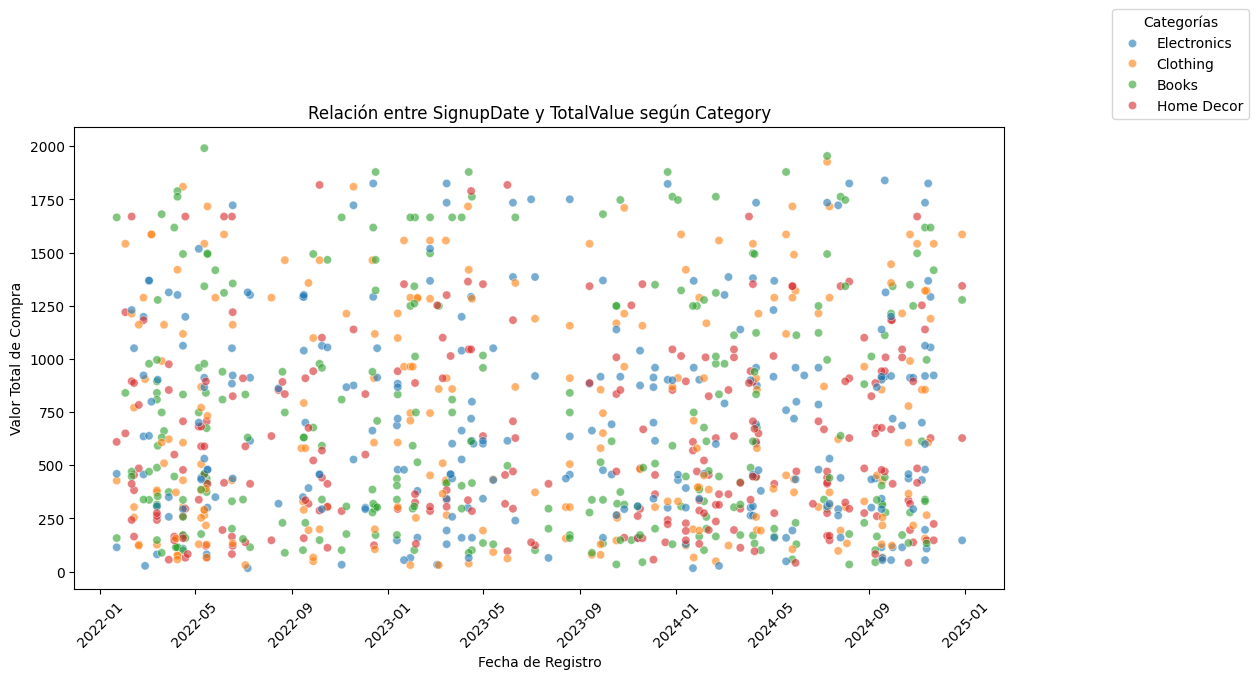

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_TotalEcommerce, x='SignupDate', y='TotalValue', hue='Category', alpha=0.6)
plt.title("Relación entre SignupDate y TotalValue según Category")
plt.xlabel("Fecha de Registro")
plt.ylabel("Valor Total de Compra")
plt.legend(title="Categorías", bbox_to_anchor=(1.02,1.02,0.25,0.25))
plt.xticks(rotation=45)
plt.show()

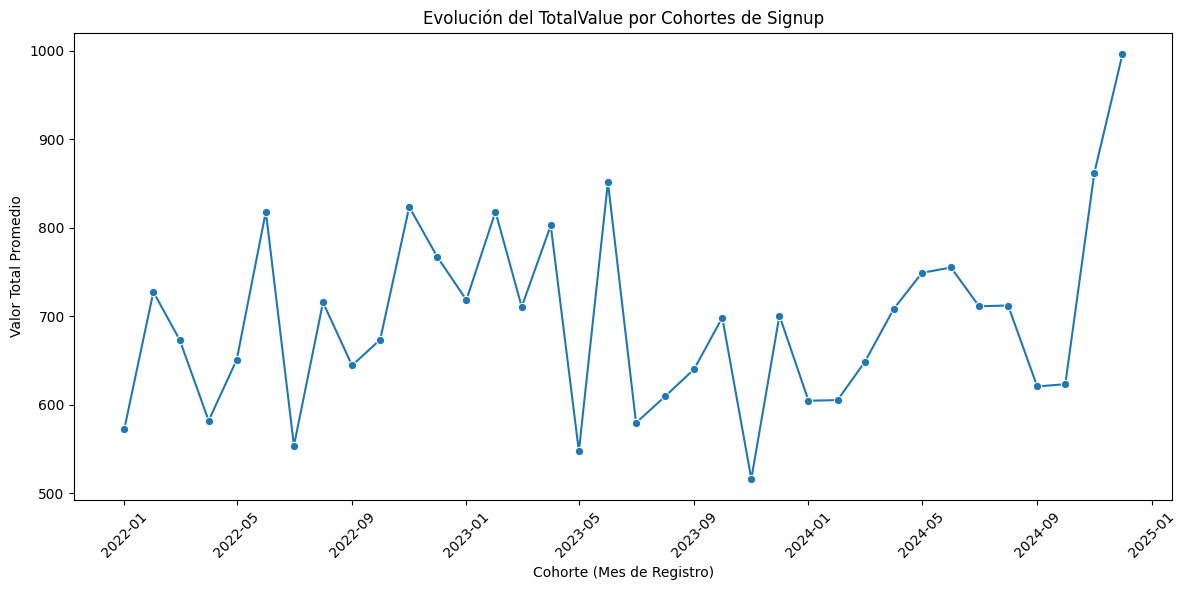

In [38]:
query_Agrupacion_Signup_TotalValue_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT DATE_TRUNC('month', cut.SignupDate) AS MesCohorte,
AVG(cut.TotalValue) AS PromedioTotalValue
FROM cte_Union_Tablas cut
GROUP BY MesCohorte
ORDER BY MesCohorte
"""

df_Agrupacion_Signup_TotalValue_Ecommerce = con.execute(query_Agrupacion_Signup_TotalValue_Ecommerce).fetchdf()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Agrupacion_Signup_TotalValue_Ecommerce, x='MesCohorte', y='PromedioTotalValue', marker='o')
plt.title("Evolución del TotalValue por Cohortes de Signup")
plt.xlabel("Cohorte (Mes de Registro)")
plt.ylabel("Valor Total Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

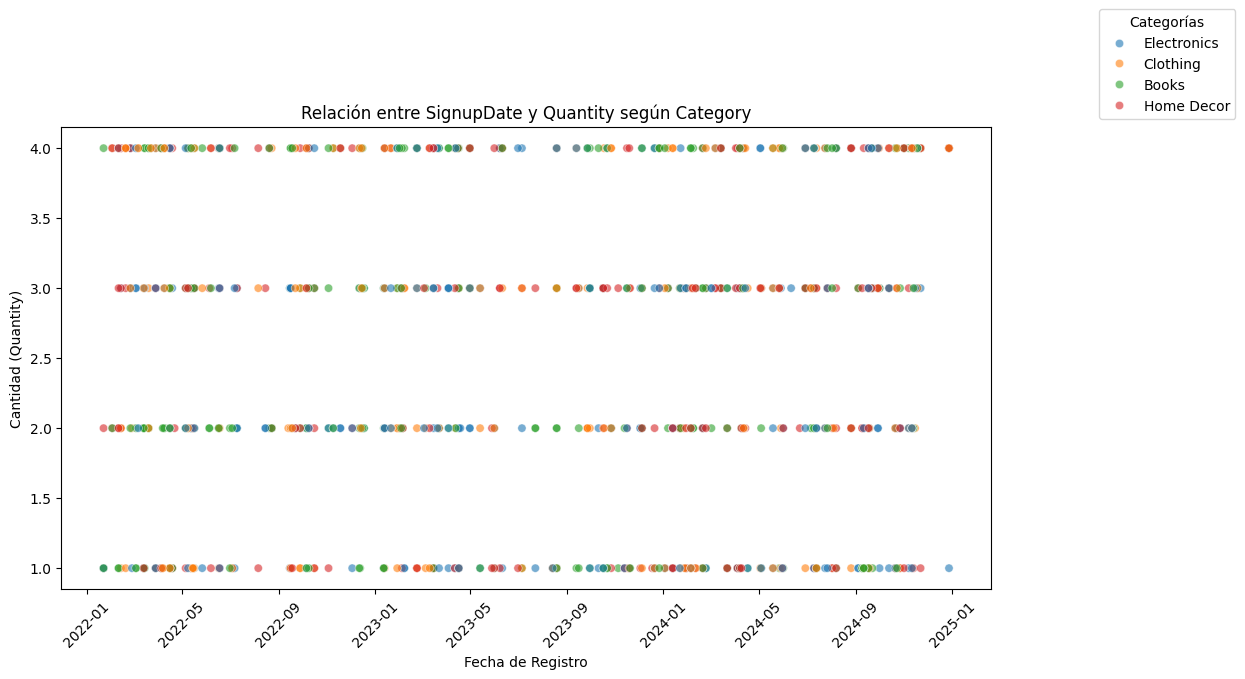

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_TotalEcommerce, x='SignupDate', y='Quantity', hue='Category', alpha=0.6)
plt.title("Relación entre SignupDate y Quantity según Category")
plt.xlabel("Fecha de Registro")
plt.ylabel("Cantidad (Quantity)")
plt.legend(title="Categorías", bbox_to_anchor=(1.02,1.02,0.25,0.25))
plt.xticks(rotation=45)
plt.show()

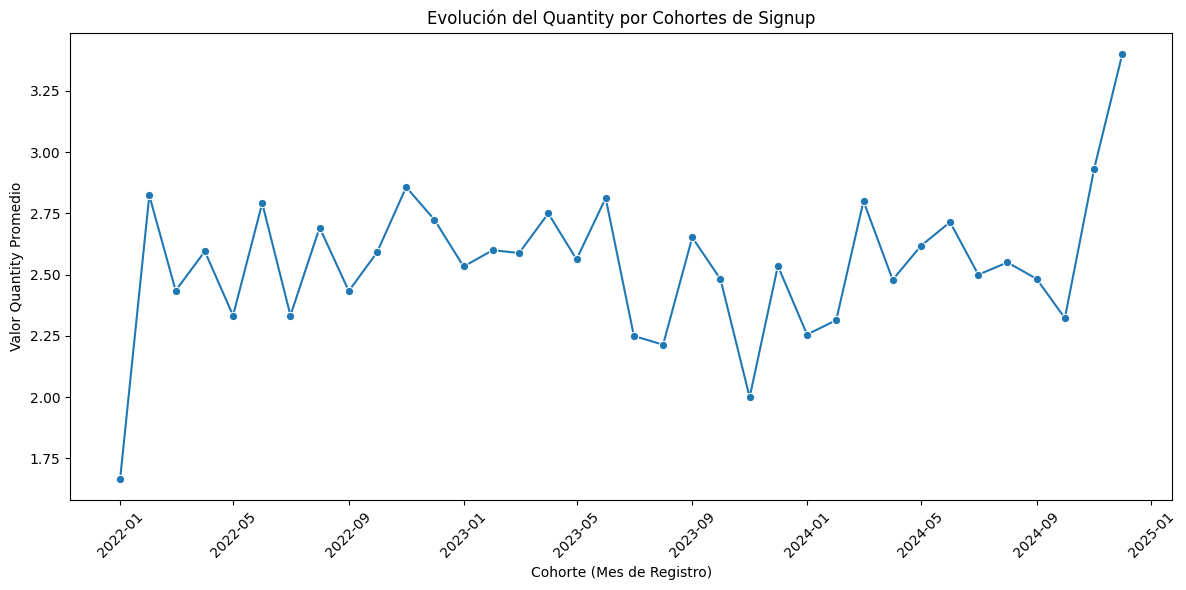

In [40]:
query_Agrupacion_Signup_Quantity_Ecommerce = """
WITH cte_Union_Tablas as (
    SELECT *,
    FROM Transactions trn
    LEFT JOIN Customers cms ON
    trn.CustomerID = cms.CustomerID
    LEFT JOIN Products pro ON
    trn.ProductID = pro.ProductID
) SELECT DATE_TRUNC('month', cut.SignupDate) AS MesCohorte,
AVG(cut.Quantity) AS PromedioQuantity
FROM cte_Union_Tablas cut
GROUP BY MesCohorte
ORDER BY MesCohorte
"""

df_Agrupacion_Signup_Quantity_Ecommerce = con.execute(query_Agrupacion_Signup_Quantity_Ecommerce).fetchdf()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Agrupacion_Signup_Quantity_Ecommerce, x='MesCohorte', y='PromedioQuantity', marker='o')
plt.title("Evolución del Quantity por Cohortes de Signup")
plt.xlabel("Cohorte (Mes de Registro)")
plt.ylabel("Valor Quantity Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusión General:

El gráfico que relaciona la fecha de registro con el TotalValue no revela una relación lineal clara. No obstante, al analizar el promedio de Quantity por cohortes de registro (meses de signup), se observan algunas tendencias que indican que el comportamiento de compra puede variar según el periodo en el que se registró el cliente.

---
### Detección de Outliers:
- ¿Existen transacciones que se comportan de forma atípica en términos de TotalValue o Quantity?
---

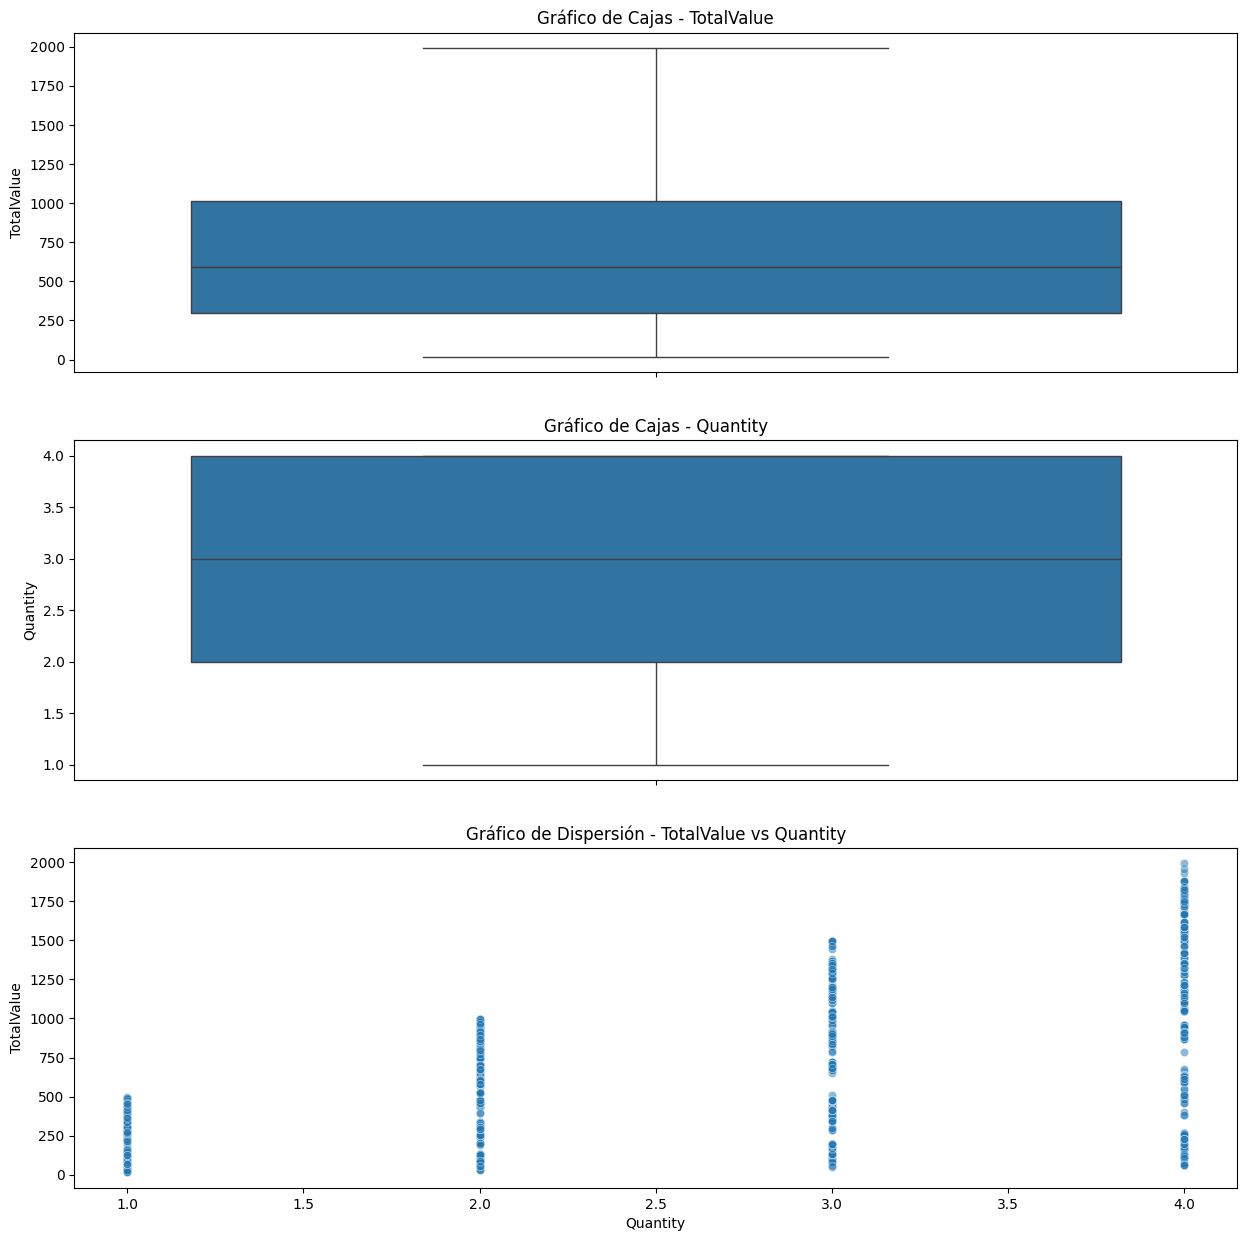

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
ax1, ax2, ax3 = axes.flatten()

sns.boxplot(y=df_TotalEcommerce['TotalValue'], ax=ax1)
ax1.set_title('Gráfico de Cajas - TotalValue')
ax1.set_ylabel('TotalValue')

sns.boxplot(y=df_TotalEcommerce['Quantity'], ax=ax2)
ax2.set_title('Gráfico de Cajas - Quantity')
ax2.set_ylabel('Quantity')

sns.scatterplot(data=df_TotalEcommerce, x='Quantity', y='TotalValue', alpha=0.5, ax=ax3)
ax3.set_title('Gráfico de Dispersión - TotalValue vs Quantity')
ax3.set_xlabel('Quantity')
ax3.set_ylabel('TotalValue')

plt.show()

# Conclusión General:

El uso de gráficos de cajas y diagramas de dispersión permite identificar la presencia de outliers, es decir, transacciones que se desvían notablemente en TotalValue o Quantity. Estos casos atípicos no se ven los graficos de caja, al parecer no hay valores atípicos.